# **Business Understanding**
Company X adalah sebuah company start-up teknologi, saat ini company sedang dilanda masalah besar, banyak karyawan yang mengajukan pengunduran diri namun perusahaan belum mengambil keputusan terkait hal tu.
## **`Problem`**
Banyak karyawan yang mengajukan pengunduran diri karena company sedang dilanda masalah besar, namun company belum mengambil keputusan terkait hal tu.
## **`Goals`**
Membantu Company X untuk menjelaskan kondisi karyawannya saat ini, serta menelusuri permasalahan yang ada di perusahaan yang menyebabkan karyawan mengajukan pengunduran diri, sehingga diperoleh solusi dari permasalahan yang ada untuk mengurangi tingkat resign karyawan.
## **`Objective`**
Membuat temuan deskriptif berdasarkan data visualisasi dan data storytelling serta membangun model Machine Learning yang dapat membantu company X menelusuri permasalahan yang ada di perusahaan yang menyebabkan karyawan mengajukan pengunduran diri. <br>
## **`Business Metrics`**
Menurunkan tingkat Resign Karyawan.


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_excel("https://raw.githubusercontent.com/FitAndraini/portfolio_data_science_and_data_analyst/master/Dataset/improving_employee_retention.xlsx")
df.head()

Username  EnterpriseID StatusPernikahan JenisKelamin  \
0  spiritedPorpoise3        111065    Belum_menikah         Pria   
1    jealousGelding2        106080    Belum_menikah         Pria   
2      pluckyMuesli3        106452          Menikah         Pria   
3   stressedTruffle1        106325    Belum_menikah         Pria   
4        shyTermite7        111171    Belum_menikah       Wanita   

  StatusKepegawaian                      Pekerjaan           JenjangKarir  \
0         Outsource   Software Engineer (Back End)  Freshgraduate_program   
1          FullTime                   Data Analyst  Freshgraduate_program   
2          FullTime  Software Engineer (Front End)  Freshgraduate_program   
3         Outsource  Software Engineer (Front End)  Freshgraduate_program   
4          FullTime                Product Manager  Freshgraduate_program   

  PerformancePegawai     AsalDaerah     HiringPlatform  ...         NomorHP  \
0       Sangat_bagus  Jakarta Timur  Employee_Referral  ...  +6282232522xxx   
1      Sangat_kurang  Jakarta Utara            Website  ...  +6281270745xxx   
2              Bagus  Jakarta Timur             Indeed  ...  +6281346215xxx   
3              Bagus  Jakarta Pusat           LinkedIn  ...  +6283233846xxx   
4              Bagus  Jakarta Timur           LinkedIn  ...  +6287883263xxx   

                             Email  TingkatPendidikan  PernahBekerja  \
0   spiritedPorpoise3135@yahoo.com           Magister              1   
1     jealousGelding2239@yahoo.com            Sarjana              1   
2      pluckyMuesli3961@icloud.com           Magister              1   
3  stressedTruffle1406@hotmail.com            Sarjana              1   
4         shyTermite7149@gmail.com            Sarjana              1   

   IkutProgramLOP   AlasanResign TanggalLahir TanggalHiring  \
0             1.0  masih_bekerja   1972-07-01    2011-01-10   
1             1.0  toxic_culture   1984-04-26    2014-01-06   
2             1.0      jam_kerja   1974-01-07    2011-01-10   
3             0.0  masih_bekerja   1979-11-24     2014-2-17   
4             0.0    ganti_karir   1974-11-07    2013-11-11   

  TanggalPenilaianKaryawan  TanggalResign  
0                2016-2-15              -  
1                2020-1-17      2018-6-16  
2               2016-01-10      2014-9-24  
3               2020-02-04              -  
4                2020-1-22     2018-09-06  

[5 rows x 25 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

# TASK 1

In [4]:
# Melihat jumlah data
for col in df:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Username:
boredEggs0           2
brainyMagpie7        2
spiritedPorpoise3    1
grudgingMeerkat3     1
boastfulSyrup4       1
                    ..
lazyPorpoise0        1
brainyFish3          1
sincereSeafowl4      1
jumpyTomatoe4        1
puzzledFish5         1
Name: Username, Length: 285, dtype: int64

Value count kolom EnterpriseID:
111065    1
106008    1
100869    1
101560    1
100874    1
         ..
105429    1
106638    1
100919    1
101306    1
106214    1
Name: EnterpriseID, Length: 287, dtype: int64

Value count kolom StatusPernikahan:
Belum_menikah    132
Menikah           57
Lainnya           48
Bercerai          47
-                  3
Name: StatusPernikahan, dtype: int64

Value count kolom JenisKelamin:
Wanita    167
Pria      120
Name: JenisKelamin, dtype: int64

Value count kolom StatusKepegawaian:
FullTime      217
Outsource      66
Internship      4
Name: StatusKepegawaian, dtype: int64

Value count kolom Pekerjaan:
Software Engineer (Back End)     

- Type data tidak sesuai **TanggalLahir**, **TanggalHiring**,**TanggalPenilaianKaryawan**, **TanggalResign**. Seharusnya bertype data datatime.
- Data kolom **PernahBekerja** tidak sesuai,  yang mana harusnya PernahBekerja itu adalah variabel yang isinya 1 semua (mayoritas 1, bukan yes). Sehingga perlu di replace value yang yes --> 1

### Handling Missing Value

In [5]:
# Cek Missing Value
df.isna().sum()

Username                                0
EnterpriseID                            0
StatusPernikahan                        0
JenisKelamin                            0
StatusKepegawaian                       0
Pekerjaan                               0
JenjangKarir                            0
PerformancePegawai                      0
AsalDaerah                              0
HiringPlatform                          0
SkorSurveyEngagement                    0
SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               3
JumlahKeterlambatanSebulanTerakhir      1
JumlahKetidakhadiran                    6
NomorHP                                 0
Email                                   0
TingkatPendidikan                       0
PernahBekerja                           0
IkutProgramLOP                        258
AlasanResign                           66
TanggalLahir                            0
TanggalHiring                           0
TanggalPenilaianKaryawan          

In [6]:
# Melihat persentase Mising Value
100.00 * (df.isnull().sum() / df.shape[0])

Username                               0.000000
EnterpriseID                           0.000000
StatusPernikahan                       0.000000
JenisKelamin                           0.000000
StatusKepegawaian                      0.000000
Pekerjaan                              0.000000
JenjangKarir                           0.000000
PerformancePegawai                     0.000000
AsalDaerah                             0.000000
HiringPlatform                         0.000000
SkorSurveyEngagement                   0.000000
SkorKepuasanPegawai                    1.742160
JumlahKeikutsertaanProjek              1.045296
JumlahKeterlambatanSebulanTerakhir     0.348432
JumlahKetidakhadiran                   2.090592
NomorHP                                0.000000
Email                                  0.000000
TingkatPendidikan                      0.000000
PernahBekerja                          0.000000
IkutProgramLOP                        89.895470
AlasanResign                          22

##### Lakukan Drop feature **IkutProgramLOP** karena Missing value > 50%

In [7]:
# Isi Data Missing Value
df.drop(["IkutProgramLOP"],axis=1, inplace=True) # Drop feature

# Alasan Resign di fill dengan 'masih_bekerja' karena memang yang tidak memiliki alasan resign, karyawannya masih ada
df['AlasanResign'] = df['AlasanResign'].fillna('masih_bekerja')

# SkorKepuasanPegawai adalah variabel dengan skala ukur Ordinal, sehingga modus adalah imputation terbaik
df['SkorKepuasanPegawai'].fillna(df['SkorKepuasanPegawai'].mode()[0], inplace=True)

# Variabel lainnya merupakan variabel dengan skala ukur ratio, sehingga median adalah imputation terbaik
df['JumlahKeikutsertaanProjek'].fillna(df['JumlahKeikutsertaanProjek'].median(), inplace=True)
df['JumlahKeterlambatanSebulanTerakhir'].fillna(df['JumlahKeterlambatanSebulanTerakhir'].median(), inplace=True)
df['JumlahKetidakhadiran'].fillna(df['JumlahKetidakhadiran'].median(), inplace=True)

In [8]:
df.isna().sum()

Username                              0
EnterpriseID                          0
StatusPernikahan                      0
JenisKelamin                          0
StatusKepegawaian                     0
Pekerjaan                             0
JenjangKarir                          0
PerformancePegawai                    0
AsalDaerah                            0
HiringPlatform                        0
SkorSurveyEngagement                  0
SkorKepuasanPegawai                   0
JumlahKeikutsertaanProjek             0
JumlahKeterlambatanSebulanTerakhir    0
JumlahKetidakhadiran                  0
NomorHP                               0
Email                                 0
TingkatPendidikan                     0
PernahBekerja                         0
AlasanResign                          0
TanggalLahir                          0
TanggalHiring                         0
TanggalPenilaianKaryawan              0
TanggalResign                         0
dtype: int64

### Handling Duplicated Data

In [9]:
df.duplicated().sum()

0

In [10]:
df.duplicated(subset=["EnterpriseID"]).sum()

0

### Analisis Nilai Tidak Sesuai

In [11]:
for i in df.columns:
    df_temp = df[i]
    if len(df_temp.unique()) < 3:
        print(f"{i}: {df_temp.value_counts()}")

JenisKelamin: Wanita    167
Pria      120
Name: JenisKelamin, dtype: int64
PernahBekerja: 1      286
yes      1
Name: PernahBekerja, dtype: int64


### Rubah Data dan Type Data

In [12]:
# Rubah Data

# Terdapat data yang tidak diketahui nilainya, isi data dengan tahun pertama kali resign 2013-01-01
#df['TanggalResign'] = df['TanggalResign'].replace('-', '2013-01-01')

# Nilai yes diganti dengan 1
df['PernahBekerja'] = df['PernahBekerja'].replace('yes', 1)
df['StatusPernikahan'] = df['StatusPernikahan'].replace('-', 'Lainnya')

In [13]:
df['PernahBekerja'].value_counts()

1    287
Name: PernahBekerja, dtype: int64

In [14]:
# Rubah Type Data
#df['TanggalLahir'] = pd.to_datetime(df['TanggalLahir'])
#df['TanggalHiring'] = pd.to_datetime(df['TanggalHiring'])  # untuk sementara tidak dirubah dulu type datanya karena kan dipakai untuk penelitian lebih lanjut
#df['TanggalPenilaianKaryawan'] = pd.to_datetime(df['TanggalPenilaianKaryawan'])
#df['TanggalResign'] = pd.to_datetime(df['TanggalResign']) # untuk sementara tidak dirubah dulu type datanya karena kan dipakai untuk penelitian lebih lanjut
#df['TanggalLahir'].value_counts()

### Membuang data yang tidak diperlukan

##### ***Mengecek nilai unique pada type data object***

In [15]:
df.select_dtypes(include='object').nunique()

Username                    285
StatusPernikahan              4
JenisKelamin                  2
StatusKepegawaian             3
Pekerjaan                    14
JenjangKarir                  3
PerformancePegawai            5
AsalDaerah                    5
HiringPlatform                9
NomorHP                     287
Email                       287
TingkatPendidikan             3
AlasanResign                 11
TanggalLahir                284
TanggalHiring                97
TanggalPenilaianKaryawan    127
TanggalResign                53
dtype: int64

##### ***Mengecek nilai unique pada type data selain object***

In [16]:
df.select_dtypes(exclude='object').nunique()

EnterpriseID                          287
SkorSurveyEngagement                    5
SkorKepuasanPegawai                     5
JumlahKeikutsertaanProjek               9
JumlahKeterlambatanSebulanTerakhir      7
JumlahKetidakhadiran                   22
PernahBekerja                           1
dtype: int64

Terdapat data yang memiliki 1 unique value sehingga perlu dilakukan **Drop** karena akan mengganggu pemodelan ML.
Dan pada data object terdapat data yang memliki unique value yang banyak, sehingga perlu dilakukan **Drop**, dan juga **Drop feature** yang tidak diperlukan. Feature **EnterpriseID** juga sebenarnya dilakukan drop, tapi untuk sekarang belum karena akan dijadikan sebagai kolom baru untuk mencari nilai berdasarkan **EnterpriseID**

In [17]:
df.drop(['Username','NomorHP','Email', 'PernahBekerja'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   EnterpriseID                        287 non-null    int64  
 1   StatusPernikahan                    287 non-null    object 
 2   JenisKelamin                        287 non-null    object 
 3   StatusKepegawaian                   287 non-null    object 
 4   Pekerjaan                           287 non-null    object 
 5   JenjangKarir                        287 non-null    object 
 6   PerformancePegawai                  287 non-null    object 
 7   AsalDaerah                          287 non-null    object 
 8   HiringPlatform                      287 non-null    object 
 9   SkorSurveyEngagement                287 non-null    int64  
 10  SkorKepuasanPegawai                 287 non-null    float64
 11  JumlahKeikutsertaanProjek           287 non-n

# TASK 2

perusahaan perlu mengetahui berapa perubahan jumlah karyawan setiap tahunnya agar bisa menyesuaikan langkah strategis guna meningkatkan kinerja perusahaan dan bisa bertahan di dunia yang terdisrupsi ini. Salah satu langkah yang telah dibuat perusahaan adalah melakukan perubahan budaya kerja setiap tahunnya yang mengacu pada jumlah karyawan yang ada, semakin banyak karyawan maka office space yang perlu disiapkan juga semakin bertambah, serta kebijakan-kebijakan lain seperti besaran bonus maksimal untuk karyawan yang performanya baik di tahun tersebut dan lain-lain. Setiap tahunnya perusahaan menyadari ada yang keluar dan ada yang masuk (karyawan), namun apabila pada tahun tertentu jumlah karyawan yang keluar lebih banyak dari yang masuk artinya perusahaan perlu berbenah diri agar karyawan lain tetap bertahan sehingga rancangan strategi jangka panjang tetap dapat dilaksanakan tanpa kendala.

In [18]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
from IPython.display import clear_output
import time

In [19]:
# Import the necessaries libraries
import plotly.offline as pyo
import plotly.express as px
import plotly.graph_objects as go

# Set notebook mode to work in offline
pyo.init_notebook_mode()

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [20]:
df["Tahun_Hiring"] = df["TanggalHiring"].map(lambda x: x[:4]) #Mengambil data tahun untuk type data string
#df['Tahun_Hiring'] = pd.to_datetime(df['TanggalHiring']).dt.year.astype(str) # Menggambil data tahun

# GroupBy kolom "Tahun_Hiring" berdasarkan penghitungan jumlah kemunculan setiap nilai dalam kolom "EnterpriseID" untuk setiap tahun.
df_waterfall_hire = df.groupby(["Tahun_Hiring"])["EnterpriseID"].count().reset_index()


df["Tahun_Resign"] = df["TanggalResign"].map(lambda x: x[:4] if x != "-" else "-")
#df["Tahun_Resign"] = pd.to_datetime(df['TanggalResign']).dt.year.astype(str)

# GroupBy kolom "Tahun_Resign" berdasarkan penghitungan jumlah kemunculan setiap nilai dalam kolom "EnterpriseID" untuk setiap tahun.
df_waterfall_resign = df.groupby(["Tahun_Resign"])["EnterpriseID"].count().reset_index()

df_plot_waterfall = pd.merge(left = df_waterfall_hire,
                             right = df_waterfall_resign,
                             how="outer",
                             right_on="Tahun_Resign",
                             left_on= "Tahun_Hiring")

df_plot_waterfall = df_plot_waterfall[["Tahun_Hiring","Tahun_Resign","EnterpriseID_x","EnterpriseID_y"]].fillna(0) # Mengisi nilai NaN dengan nilai 0
df_plot_waterfall.columns = ["Tahun_Hiring","Tahun_Resign","Total_Hired","Total_Resigned"] #Merubah nama column

# Menghitung total karyawan berdasarkan dari jumlah karyawan yang dihired("total_hired")----/
# dan mengurangkan jumlah karyawan yang mengundurkan diri ("total_resigned").
df_plot_waterfall["Total_karyawan"] = df_plot_waterfall["Total_Hired"].cumsum() - df_plot_waterfall["Total_Resigned"]


# Menghitung perubahan karyawan pada setiap waktu dengan melihat---/
# selisih antara jumlah karyawan yang dihired("total_hired") dan--/
#jumlah karyawan yang mengundurkan diri ("total_resigned")
df_plot_waterfall["Perubahan_Karyawan"] = df_plot_waterfall["Total_Hired"] - df_plot_waterfall["Total_Resigned"]

df_plot_waterfall

Tahun_Hiring Tahun_Resign  Total_Hired  Total_Resigned  Total_karyawan  \
0          2006            0          1.0             0.0             1.0   
1          2007            0          2.0             0.0             3.0   
2          2008            0          2.0             0.0             5.0   
3          2009            0          7.0             0.0            12.0   
4          2010            0          8.0             0.0            20.0   
5          2011            0         76.0             0.0            96.0   
6          2012            0         41.0             0.0           137.0   
7          2013         2013         43.0             5.0           175.0   
8          2014         2014         56.0            12.0           224.0   
9          2015         2015         31.0             8.0           259.0   
10         2016         2016         14.0             8.0           273.0   
11         2017         2017          5.0            19.0           267.0   
12         2018         2018          1.0            26.0           261.0   
13            0            -          0.0           198.0            89.0   
14            0         2019          0.0             5.0           282.0   
15            0         2020          0.0             6.0           281.0   

    Perubahan_Karyawan  
0                  1.0  
1                  2.0  
2                  2.0  
3                  7.0  
4                  8.0  
5                 76.0  
6                 41.0  
7                 38.0  
8                 44.0  
9                 23.0  
10                 6.0  
11               -14.0  
12               -25.0  
13              -198.0  
14                -5.0  
15                -6.0

In [21]:
layout = go.Layout(
    title= "Dinamika Total Karyawan Pertahun (2006 - 2021)",
    showlegend=False,
    yaxis=dict(title='Total Karyawan'),
    xaxis=dict(title='Tahun')

)

all_employees = int(df_plot_waterfall["Total_Hired"].sum()-df_plot_waterfall["Total_Resigned"].sum())

fig = go.Figure(go.Waterfall( #Membuat sebuah objek Figure menggunakan perpustakaan Plotly menggunakan Grafik Waterfall.
    name = "20", orientation = "v",  #Orientasi grafik adalah vertikal
    measure = ["relative" for x in range(len(df_plot_waterfall["Perubahan_Karyawan"]))]+["total"],#pengukuran untuk setiap elemen diukur relatif dan pada akhirnya akan diukur sebagai total dalam grafik waterfall
    x = df_plot_waterfall["Tahun_Hiring"].tolist()+[2021], #mengatur sumbu X berdasarkan Tahun_Hiring mulai awal sampai batas 2021
    textposition = "outside", #mengatur posisi teks yang menunjukkan nilai-nilai pada grafik menjadi di luar elemen batang.
    text = [str(x) if x <=0 else "+"+str(x) for x in df_plot_waterfall["Perubahan_Karyawan"]]+[str(all_employees)], #nilai yang akan ditampilkan pada setiap batang grafik, nilai berdasarkan penjumlahan dari perubahan karyawan dan all_employees
    y = df_plot_waterfall["Perubahan_Karyawan"].tolist()+[str(all_employees)], #nilai yang yang diperoleh dari text tadi akan ditempatkan disumbu Y
    connector = {"line":{"color":"rgb(63, 63, 63)", "dash":"solid"}},# konfigurasi untuk konektor yang menghubungkan elemen-elemen dalam grafik waterfall
    ),
    layout= layout
)

fig.show()

Interpretasi Berdasarkan Hasil Plot <br>
- Sejak tahun 2006-2012 terjadi kenaikan jumlah karyawan, dan kenaikan tertinggi pada tahun 2011 dengan jumlah 76.
- Kemudian tahun 2013 terjadi penurunan jumlah karyawan yang sangat signifikan melebihi total karyawan masuk
- Kemudian terjadi penambahan jumlah karyawan lagi tahun 2014-2016, disusul terjadi pengurangan jumlah karyawan lagi tahun 2017 hingga tahun 2021.

# TASK 3
1.	Buatlah dua data frame terpisah yang masing-masing dibentuk dari hasil agregasi jumlah employee berdasarkan pekerjaan, yang sudah resign maupun yang belum resign
Hint: Gunakan filter value pada data frame agar memisahkan dua data frame tentang sudah resign atau belum
2.	Gabungkan kedua dataframe tersebut berdasarkan key Pekerjaan
Hint: Gunakan outer join
3.	Buatlah dua kolom baru dari tabel baru tersebut, yaitu jumlah employee dan persentase jumlah employee yang masih ada (belum resign)
Hint: Kolom jumlah employee didapatkan dengan menambahkan total employee yang masih ada dan sudah resign, sedangkan yang persentase employee yang masih ada, cukup membagi existing employee dengan total employee
4.	Buatlah plot yang menampilkan persentase employee yang masih ada berdasarkan divisi pekerjaannya
Hint: Perhatikan jenis plot yang digunakan
5. Divisi yang memiliki tingkat resign tertinggi, buatlah tabel agregasi untuk menghitung jumlah employee yang resign berdasarkan Jenjang Karir, Performa Karyawan, dan Alasan Resign
Hint: Pastikan yang memiliki tingkat resign tertinggi ini sudah tepat
6. Buatlah plot yang menampilkan tabel agregasi pada tahap sebelumnya
Hint:L Perhatikan jenis plot yang digunakan
7.	Tuliskan interpretasi dan rekomendasi terhadap hasil plot pada langkah sebelumnya
Hint: Perhatikan apa yang menyebabkan divisi tersebut banyak yang resign, langkah apa yang perlu dilakukan management angar tidak terjadi lagi hal yang seperti itu

In [22]:
# membuat kolom baru bernama "isResign"--/
#dalam DataFrame df.Kolom "isResign" akan berisi 1 jika nilai dalam kolom "TanggalResign" --/
#bukan tanda strip ("-"), yang berarti pengunduran diri.--/
#Jika nilai adalah tanda strip, maka nilai dalam kolom "isResign" akan tetap menjadi tanda strip ("-").
df["isResign"] = df["TanggalResign"].map(lambda x: 1 if x != "-" else x)

#Mengambil baris-baris di DataFrame df dimana nilai dalam kolom "isResign" adalah 1 (artinya ada tanggal pengunduran diri)--/
#Kemudian, dikelompokkan berdasarkan "Pekerjaan" dan menghitung berapa banyak entri dalam setiap kelompok menggunakan kolom "EnterpriseID"
df_resign = df.query("isResign==1").groupby(["Pekerjaan"])["EnterpriseID"].count().reset_index()
df_hire = df.query("isResign!=1").groupby(["Pekerjaan"])["EnterpriseID"].count().reset_index()

df_campuran = pd.merge(left = df_hire,
                       right = df_resign,
                       how="outer",
                       on = "Pekerjaan").fillna(0) #jika terdapat nilai NaN isi dengan 0

df_campuran.columns = ["Pekerjaan", "Existing_Employee", "Resigned_Employee"] #Merubah nama columns (nilai yang diambil berdasarkan EnterpriseID dengan kondisi 1=mengundurkan dir diubah jadi nama Resigned Employee)
df_campuran["TotalEmployee"] = df_campuran["Existing_Employee"]+df_campuran["Resigned_Employee"] #Mencari Total Employee
df_campuran["Existing_Percentage"] = round(100.00*df_campuran["Existing_Employee"]/df_campuran["TotalEmployee"],2) #Menghitung percentase karyawan yang masih ada dengan cara karyawan yang masih ada dibagi dengan jumlah karyawan
df_campuran.sort_values(["Existing_Percentage"])



Pekerjaan  Existing_Employee  Resigned_Employee  \
0                     Data Analyst                  8                8.0   
12   Software Engineer (Front End)                 44               28.0   
5         Product Design (UI & UX)                 15                9.0   
7                  Product Manager                 11                6.0   
1                    Data Engineer                  7                3.0   
10     Software Engineer (Android)                 17                7.0   
11    Software Engineer (Back End)                 81               28.0   
2                  DevOps Engineer                  3                0.0   
3          Digital Product Manager                  2                0.0   
4        Machine Learning Engineer                  2                0.0   
6   Product Design (UX Researcher)                  1                0.0   
8                     Scrum Master                  3                0.0   
9               Software Architect                  1                0.0   
13         Software Engineer (iOS)                  3                0.0   

    TotalEmployee  Existing_Percentage  
0            16.0                50.00  
12           72.0                61.11  
5            24.0                62.50  
7            17.0                64.71  
1            10.0                70.00  
10           24.0                70.83  
11          109.0                74.31  
2             3.0               100.00  
3             2.0               100.00  
4             2.0               100.00  
6             1.0               100.00  
8             3.0               100.00  
9             1.0               100.00  
13            3.0               100.00

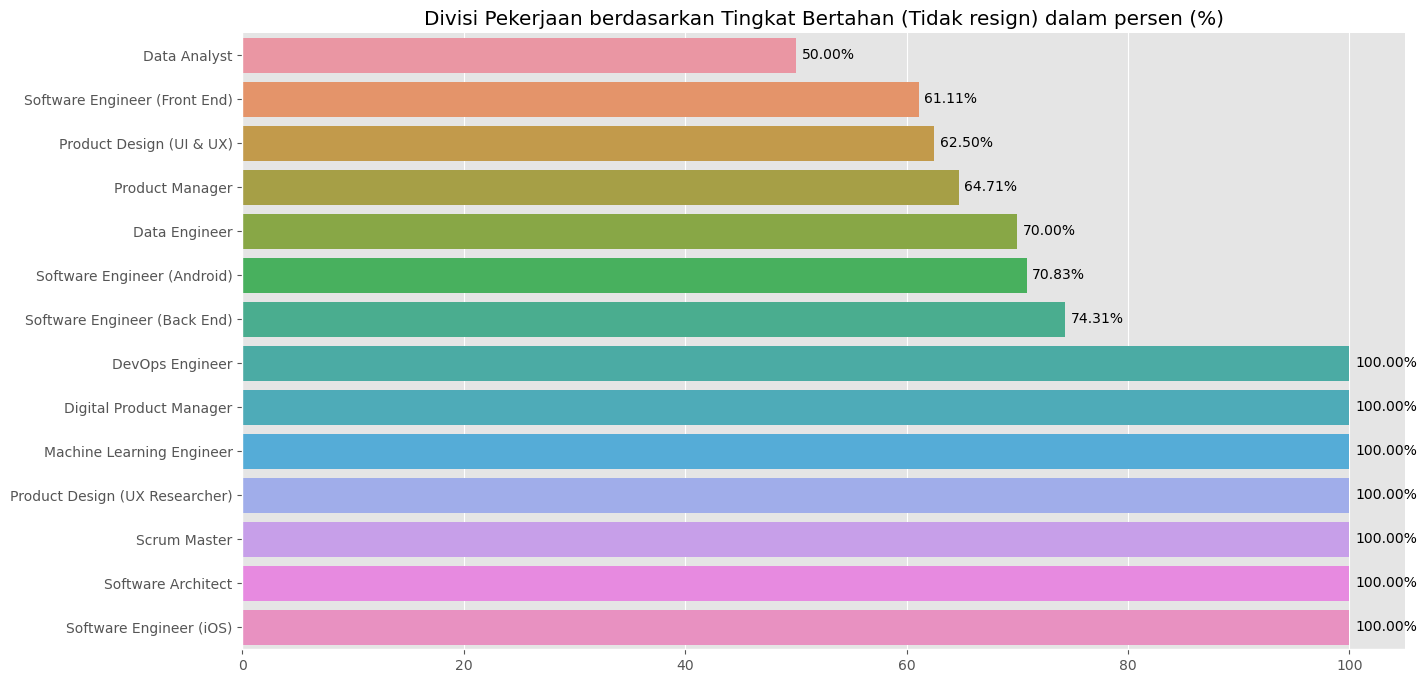

In [23]:
#custom_palette = ["#FF5733", "#33FFA8", "#337DFF", "#FF33E1", "#FFC933"]
#sns.set_palette("Set1")
#custom_palette = sns.color_palette("husl", len(df_campuran))  # Menggunakan palet "husl"
#sns.set_palette(custom_palette)

plt.style.use('ggplot') #Mengatur gaya plot menjadi gaya 'ggplot'
plt.figure(figsize=(15,8))


ax1 = sns.barplot(y = "Pekerjaan", # Membuat plot batang (barplot) dengan Seaborn.--/
                  x = "Existing_Percentage", #Ini akan menggambarkan perbandingan persentase pekerjaan yang bertahan (Existing_Percentage) pada sumbu x --/
                  data = df_campuran.sort_values(["Existing_Percentage"])) #dan nama pekerjaan (Pekerjaan) pada sumbu y.
                  # color= ["#FF5733", "#33FFA8", "#337DFF", "#FF33E1", "#FFC933"])

ax1.set_ylabel('') #Menghilangkan label pada sumbu y dan x.
ax1.set_xlabel('')
ax1.spines['right'].set_visible(False) #Menghilangkan garis di sebelah kanan dan atas dari bingkai plot.
ax1.spines['top'].set_visible(False)
ax1.set_title('Divisi Pekerjaan berdasarkan Tingkat Bertahan (Tidak resign) dalam persen (%)') #Judul untuk plot.

# Menambahkan nilai persentase pada masing-masing batang
for p in ax1.patches: # Looping melalui semua elemen "patch" yang mewakili batang dalam plot.
    percentage = '{:.2f}%'.format(p.get_width()) #Menghitung persentase dari lebar batang menggunakan .get_width() dan memformatnya menjadi angka desimal dengan dua digit angka di belakang koma.

    #Menghitung posisi x dan y untuk menempatkan teks persentase di atas masing-masing batang.
    x = p.get_x() + p.get_width() + 0.5  # 0.5 adalah jarak horizontal dari batang
    y = p.get_y() + p.get_height() / 2  # Posisi vertikal pada tengah batang
    ax1.annotate(percentage, (x, y), ha='left', va='center', fontsize=10, color='black') #Menambahkan teks persentase di atas setiap batang. ha='left' mengatur teks ditempatkan di sisi kiri batang
plt.show()

In [24]:
# Memfilter data dimana yang diambil hanya untuk karyawan dengan pekerjaan "Data Analyst" --/
# kemudian, data ini dikelompokkan berdasarkan kolom-kolom "JenjangKarir", "PerformancePegawai", dan "AlasanResign".--/
# dengan menghitung berapa kali masing-masing kombinasi nilai muncul dalam kelompok data tersebut
df_filter = df.query("Pekerjaan == 'Data Analyst'").groupby(["JenjangKarir","PerformancePegawai","AlasanResign"]).count()["EnterpriseID"].reset_index()
df_filter

JenjangKarir PerformancePegawai       AlasanResign  EnterpriseID
0   Freshgraduate_program              Bagus      masih_bekerja             1
1   Freshgraduate_program              Bagus      toxic_culture             1
2   Freshgraduate_program              Biasa  internal_conflict             1
3   Freshgraduate_program              Biasa      masih_bekerja             1
4   Freshgraduate_program              Biasa      toxic_culture             1
5   Freshgraduate_program       Sangat_bagus  internal_conflict             1
6   Freshgraduate_program       Sangat_bagus      toxic_culture             3
7   Freshgraduate_program      Sangat_kurang      toxic_culture             1
8               Mid_level              Bagus      masih_bekerja             1
9               Mid_level             Kurang      masih_bekerja             1
10              Mid_level       Sangat_bagus      masih_bekerja             4

**Insight** <br>
Analisis ini berfokus divisi pekerjaan dengan tingkat resign paling tinggi.
- Divisi Data Analyst memiliki tingkat resign tertinggi (50%), diikuti dengan **Software Enginer (Front End) 39%**, **Product Design (UI & UX) 38%**, **Product Manager 36%**, **Data Engineer 30%**, **Software Engineer (Android) 29%**, **Software Engineer (Back End) 25%**.
- Ternyata profesi Data Analyst yang merupakan tingkat resign tertinggi didominasi dengan jenjang karir adalah Fresh graduate dengan alasan resign toxic_culture dan internal_conflict.<br>

**Rekomendasi dari Insight :**<br>
Dalam Masalah ini menunjukkan adanya masalah dalam manajemen atau kepemimpinan pada tingkat yang lebih tinggi terhadap tingkat dibawahnya. Oleh karena itu sepantasnya perusahaan melakukan perubahan tim atau atasan divisi sehingga tidak terjadi lagi karyawan baru yang resign karena budaya divisinya.


In [25]:
plt.figure(figsize=(12,8))
fig = px.sunburst(df_filter, path=['JenjangKarir', 'PerformancePegawai', 'AlasanResign'], values='EnterpriseID',
                 title= "Jumlah Karyawan Divisi Data Analyst berdasarkan Jenjang Karir, Performance, dan Kondisi Terakhir di Perusahaan")
fig.show()

<Figure size 1200x800 with 0 Axes>

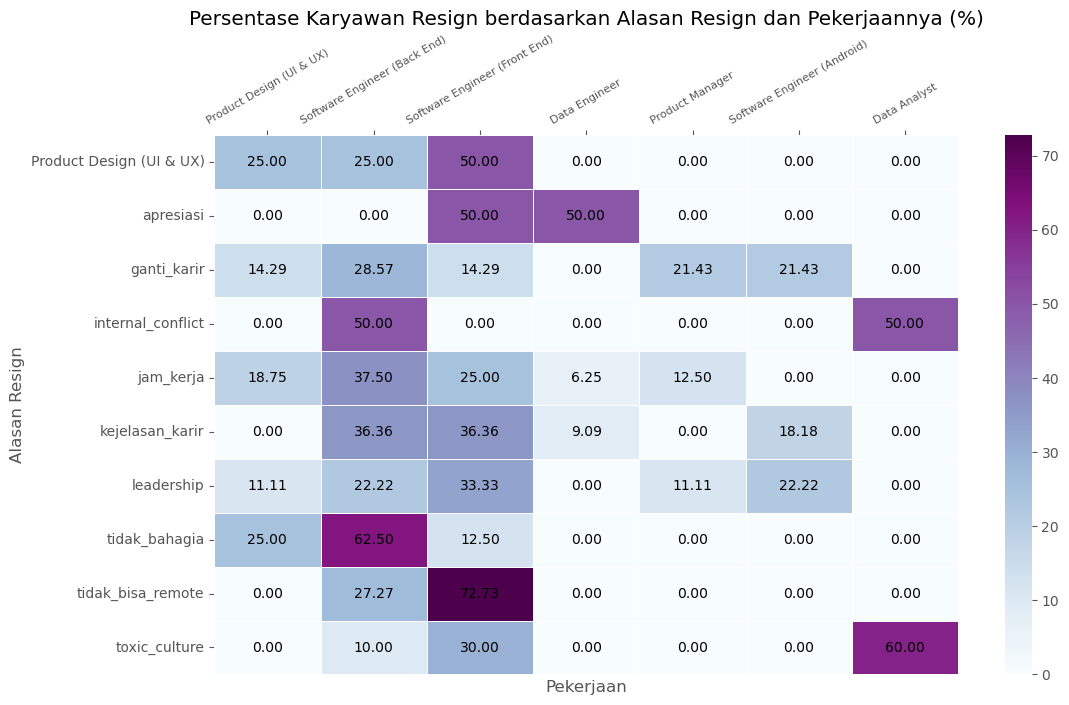

In [26]:
# jumlah karyawan yang telah mengundurkan diri (resign) yang dikelompokkan berdasarkan kombinasi nilai-nilai unik dari kolom "AlasanResign" dan "Pekerjaan".
df_score = df.query("isResign==1").groupby(["AlasanResign","Pekerjaan"])["EnterpriseID"].count().reset_index()

#berisi data yang akan digunakan untuk membuat plot heatmap dengan menyimpan jumlah karyawan yang mengundurkan diri---/
#berdasarkan alasan dan pekerjaannya dalam bentuk matriks---/
#dengan baris sebagai alasan dan kolom sebagai pekerjaan.---/
# Kita mengisi nilai kosong dengan 0 dan mengambil data dari DataFrame df_score yang telah dibentuk sebelumnya.
review_matrix = []
performance_sort = df_score["Pekerjaan"].unique()
for x in df_score["AlasanResign"].unique():
    temp_df = df_score[df_score["AlasanResign"]==x].set_index("Pekerjaan")["EnterpriseID"].reindex(performance_sort).fillna(0)
    temp_vector = [int(x) for x in temp_df.reset_index()["EnterpriseID"]]
    review_matrix.append(temp_vector)

# menghitung persentase karyawan yang mengundurkan diri ---/
# berdasarkan alasan dan pekerjaannya. ---/
# Nilai persentase dihitung dengan membagi setiap nilai dalam review_matrix dengan jumlah total karyawan yang mengundurkan diri
# berdasarkan alasan tertentu. ---/
# Hasil akhir dari proses ini adalah review_pivot, yang merupakan DataFrame yang berisi persentase karyawan resign berdasarkan alasan dan pekerjaannya.
review_pivot = pd.DataFrame(review_matrix,columns=performance_sort,index=df_score["AlasanResign"].unique())
division_list = np.sum(review_pivot,axis=1).reset_index()[0].tolist()
for index,value in enumerate(review_pivot.index):
    review_pivot.loc[value] = round(100.00*review_pivot.loc[value]/division_list[index],2)

# Create Plot
plt.figure(figsize=(12,7))
# Fungsi ini digunakan untuk membuat heatmap dengan nilai-nilai dari review_pivot.---/
# Parameter seperti annot=True digunakan untuk menampilkan nilai-nilai di dalam sel, ---/
# fmt=',.02f' mengatur format tampilan angka di dalam sel, cmap="YlGnBu" mengatur palet warna heatmap.
ax = sns.heatmap(review_pivot, linewidths=.5, annot=True, fmt=',.02f', cmap="BuPu", cbar=True, annot_kws={"color": "black"})
ax.xaxis.set_ticks_position('top') #Mengatur posisi label sumbu x ke atas heatmap.
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30, fontsize = 8) #Mengatur label sumbu x dengan rotasi 30 derajat dan ukuran font 8.
ax.set_ylabel('Alasan Resign')
ax.set_xlabel('Pekerjaan')
ax.set_title("Persentase Karyawan Resign berdasarkan Alasan Resign dan Pekerjaannya (%)")
plt.show()

**Insight**
- Ternyata persentase karyawan resign jika dilihat berdasarkan divisi pekerjaan dan alasannya, divisi dengan tingkat resign terbanyak adalah Software Engineer (Front End) sebesar 72.73% dengan alasan resign **tidak_bisa_remote**, kemudian diikuti dengan divisi Software Engineer (Back End) sebesar 62.50% dengan alasan tidak_bahagia.
- Ternyata banyak dari karyawan yang resign berasal dari divisi Software Engineer baik itu Front End maupun Back End dengan alasan yang beragam.

**Rekomendasi dari Insight** <br>
Berdasarkan Alasan Resign Karyawan sebaiknya Company perlu mempertimbangkan ulang terkait alasan-alasan tersebut untuk bisa merubah apa yang seharusnya company bisa rubah untuk kesenjangan karyawan, misalnya menerapkan sistem kerja remote, jika itu memungkinkan untuk dilakukan dan tidak berdampak negarif bagi company kenapa tidak dilakukan.




# TASK 4


# **Preprocessing dan Model**

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   EnterpriseID                        287 non-null    int64  
 1   StatusPernikahan                    287 non-null    object 
 2   JenisKelamin                        287 non-null    object 
 3   StatusKepegawaian                   287 non-null    object 
 4   Pekerjaan                           287 non-null    object 
 5   JenjangKarir                        287 non-null    object 
 6   PerformancePegawai                  287 non-null    object 
 7   AsalDaerah                          287 non-null    object 
 8   HiringPlatform                      287 non-null    object 
 9   SkorSurveyEngagement                287 non-null    int64  
 10  SkorKepuasanPegawai                 287 non-null    float64
 11  JumlahKeikutsertaanProjek           287 non-n

- Tidak ada Missing Value
- Tidak ada Duplicate
- Tidak ada data yang aneh lagi
- Tidak ada Invalid data
- **Label : isResign**

### Feature Extraction (Feature Engineering)

Mencoba mengektrak beberapa kolom menjadi kolom baru

In [28]:
#df['LahirDay'] = pd.to_datetime(df['TanggalLahir']).dt.day
#df['LahirMonth'] = pd.to_datetime(df['TanggalLahir']).dt.month
#df['LahirYear'] = pd.to_datetime(df['TanggalLahir']).dt.year
#df['HiringDay'] = pd.to_datetime(df['TanggalHiring']).dt.day
#df['HiringMonth'] = pd.to_datetime(df['TanggalHiring']).dt.month
#df['PenilaianDay'] = pd.to_datetime(df['TanggalPenilaianKaryawan']).dt.day
#df['PenilaianMonth'] = pd.to_datetime(df['TanggalPenilaianKaryawan']).dt.month
#df['PenilaianYear'] = pd.to_datetime(df['TanggalPenilaianKaryawan']).dt.year
#df['ResignDay'] = pd.to_datetime(df['TanggalResign']).dt.day
#df['ResignMonth'] = pd.to_datetime(df['TanggalResign']).dt.month
#df.rename(columns={'TahunHiring': 'HiringYear', 'TahunResign': 'ResignYear'}, inplace=True)

In [29]:
df["keikutsertaan_project"] = df["JumlahKeikutsertaanProjek"].map(lambda x: 1 if x!=0 else 0) #berisi nilai 1 jika nilai != 0, berisi 0 jika nilai ==0
df["Target"] = df["isResign"].map(lambda x: 1 if x == 1 else 0) #berisi nilai 1 jika ==1, berisi 0 jika nilai selain 1

df["lama_bekerja"] = df["Tahun_Resign"].map(lambda x: 0 if x == "-" else x).astype(int) - df["Tahun_Hiring"].astype(int) #berisi 0 jika Tahun_Resign == '-'
df["lama_bekerja"] = df["lama_bekerja"].map(lambda x: 0 if x < 0 else x) #berisi 0 jika nilai lama_bekerja < 0
df["usia_hired"] = df["Tahun_Hiring"].astype(int) - df["TanggalLahir"].map(lambda x: int(x[:4])).astype(int)
df["jarak_penilaian_tahun"] = df["TanggalPenilaianKaryawan"].map(lambda x: int(x[:4])).astype(int) - df["Tahun_Hiring"].astype(int)

### Feature Selection (Feature Engineering)

**Drop feature yang tidak digunakan lagi**

In [30]:
# Rubah type data
df['Tahun_Hiring'] = df['Tahun_Hiring'].astype(int)
df['Tahun_Resign'] = df['Tahun_Resign'].replace('-', '0').astype(int)

In [31]:
# Drop Feature
list_drop = ["TanggalHiring","TanggalLahir","TanggalPenilaianKaryawan",
                 "TanggalResign","isResign"]
df_ml = df.drop(list_drop,axis=1)
df_ml.head()

EnterpriseID StatusPernikahan JenisKelamin StatusKepegawaian  \
0        111065    Belum_menikah         Pria         Outsource   
1        106080    Belum_menikah         Pria          FullTime   
2        106452          Menikah         Pria          FullTime   
3        106325    Belum_menikah         Pria         Outsource   
4        111171    Belum_menikah       Wanita          FullTime   

                       Pekerjaan           JenjangKarir PerformancePegawai  \
0   Software Engineer (Back End)  Freshgraduate_program       Sangat_bagus   
1                   Data Analyst  Freshgraduate_program      Sangat_kurang   
2  Software Engineer (Front End)  Freshgraduate_program              Bagus   
3  Software Engineer (Front End)  Freshgraduate_program              Bagus   
4                Product Manager  Freshgraduate_program              Bagus   

      AsalDaerah     HiringPlatform  SkorSurveyEngagement  ...  \
0  Jakarta Timur  Employee_Referral                     4  ...   
1  Jakarta Utara            Website                     4  ...   
2  Jakarta Timur             Indeed                     4  ...   
3  Jakarta Pusat           LinkedIn                     3  ...   
4  Jakarta Timur           LinkedIn                     3  ...   

   JumlahKetidakhadiran  TingkatPendidikan   AlasanResign  Tahun_Hiring  \
0                   9.0           Magister  masih_bekerja          2011   
1                   3.0            Sarjana  toxic_culture          2014   
2                  11.0           Magister      jam_kerja          2011   
3                   6.0            Sarjana  masih_bekerja          2014   
4                  11.0            Sarjana    ganti_karir          2013   

  Tahun_Resign keikutsertaan_project  Target  lama_bekerja  usia_hired  \
0            0                     0       0             0          39   
1         2018                     1       1             4          30   
2         2014                     0       1             3          37   
3            0                     0       0             0          35   
4         2018                     0       1             5          39   

   jarak_penilaian_tahun  
0                      5  
1                      6  
2                      5  
3                      6  
4                      7  

[5 rows x 23 columns]

### Handling Outliers (Numeric)

##### **Cek Outlier sebelum dilakukan Handle Outlier**

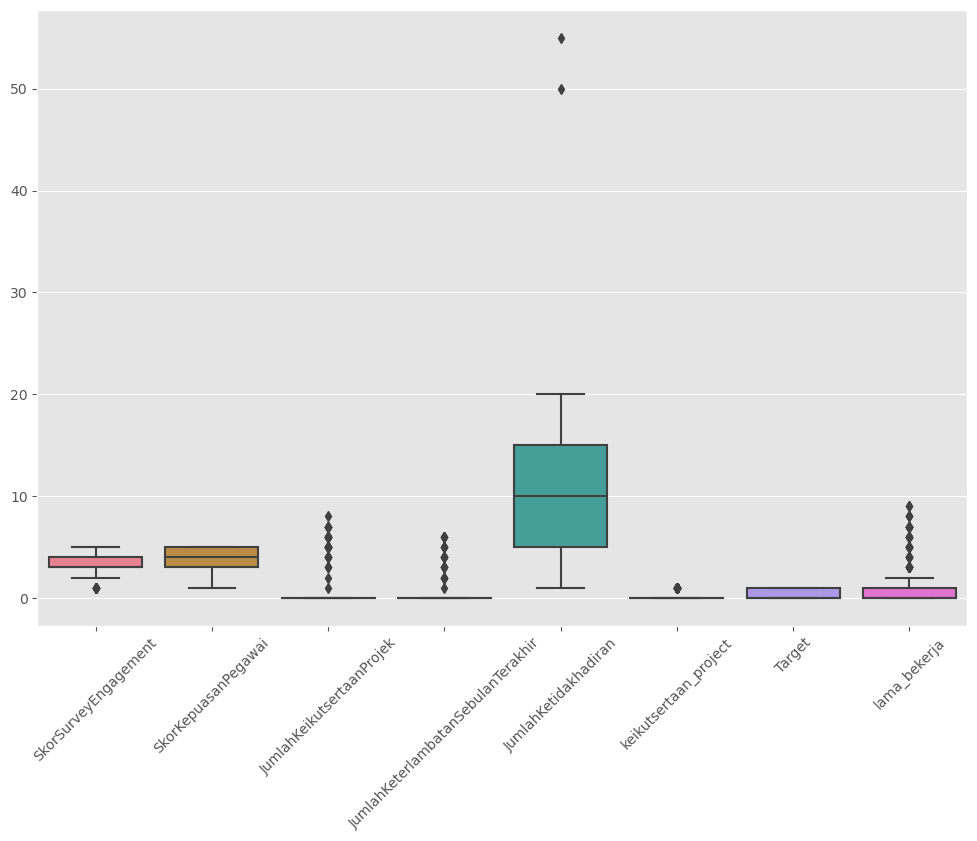

In [32]:
# Use Boxplot
df_numerical = df_ml.select_dtypes(include = ["int64","float64"])

# Figure Size Setting
plt.figure(figsize=(12,8))

# Boxplot using Seaborn
sns.boxplot(data=df_numerical.drop(["EnterpriseID"],axis=1),
            palette="husl")
plt.xticks(rotation=45)
# Show the plot
plt.show()

In [33]:
df_numerical.describe()

EnterpriseID  SkorSurveyEngagement  SkorKepuasanPegawai  \
count     287.000000            287.000000           287.000000   
mean   105923.324042              3.101045             3.888502   
std      4044.977599              0.836388             0.913060   
min    100282.000000              1.000000             1.000000   
25%    101269.000000              3.000000             3.000000   
50%    106069.000000              3.000000             4.000000   
75%    110514.500000              4.000000             5.000000   
max    111703.000000              5.000000             5.000000   

       JumlahKeikutsertaanProjek  JumlahKeterlambatanSebulanTerakhir  \
count                 287.000000                          287.000000   
mean                    1.167247                            0.411150   
std                     2.285537                            1.273018   
min                     0.000000                            0.000000   
25%                     0.000000                            0.000000   
50%                     0.000000                            0.000000   
75%                     0.000000                            0.000000   
max                     8.000000                            6.000000   

       JumlahKetidakhadiran  keikutsertaan_project      Target  lama_bekerja  
count            287.000000             287.000000  287.000000    287.000000  
mean              10.439024               0.219512    0.310105      1.254355  
std                6.829769               0.414639    0.463344      2.353715  
min                1.000000               0.000000    0.000000      0.000000  
25%                5.000000               0.000000    0.000000      0.000000  
50%               10.000000               0.000000    0.000000      0.000000  
75%               15.000000               0.000000    1.000000      1.000000  
max               55.000000               1.000000    1.000000      9.000000

`SkorSurveyEngagement`,`JumlahKeikutsertaanProjek`, `JumlahKeterlambatanSebulanTerakhir`, `keikutsertaan_project`, `lama_bekerja`, `jarak penilaian tahun` meeliki ourlier namun ditoleransi outliernya karena standar deviasinya rendah. Namun tidak untuk sisanya karena standar deviasi yang tinggi.

In [34]:
#!pip install ./libraryku.py

In [35]:
#from libraryku import remove_outliers

#df_clean = remove_outliers(df_ml,
                           #verbose=True,
                           #keep=["EnterpriseID",
                                 #"SkorSurveyEngagement",
                                 #"SkorKepuasanPegawai",
                                 #"JumlahKeikutsertaanProjek",
                                 #"JumlahKeterlambatanSebulanTerakhir",
                                 #"Tahun_Hiring",
                                 #"Tahun_Resign",
                                 #"keikutsertaan_project",
                                 #"Target",
                                 #"lama_bekerja",
                                # "jarak_penilaian_tahun"],
                           #imputation="median")

In [36]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df_ml)}')

filtered_entries = np.array([True] * len(df_ml))
for col in ['JumlahKetidakhadiran',	'usia_hired']:
    Q1 = df_ml[col].quantile(0.25)
    Q3 = df_ml[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df_ml[col] >= low_limit) & (df_ml[col] <= high_limit)) & filtered_entries

df_clean = df_ml[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_clean)}')

Jumlah baris sebelum memfilter outlier: 287
Jumlah baris setelah memfilter outlier: 276


##### **Setelah dilakukan Handle Outlier**

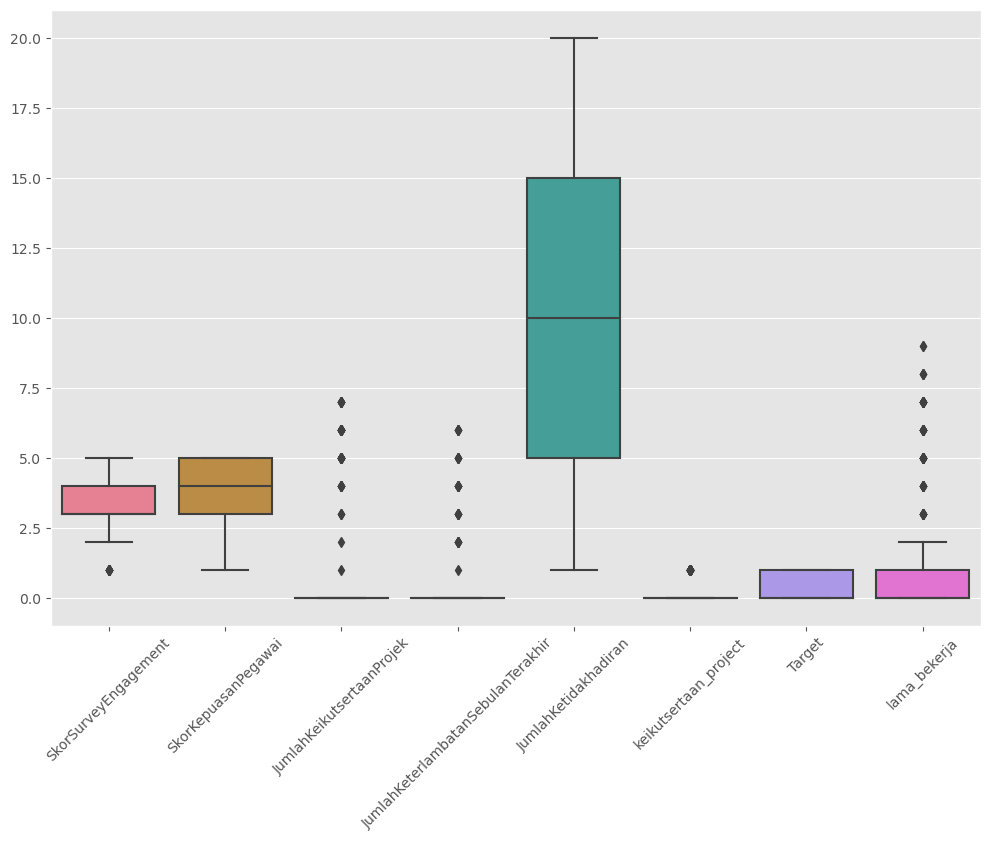

In [37]:
# Use Boxplot
df_numerical2 = df_clean.select_dtypes(include = ["int64","float64"])

# Figure Size Setting
plt.figure(figsize=(12,8))

# Boxplot using Seaborn
sns.boxplot(data=df_numerical2.drop(["EnterpriseID"],axis=1),
            palette="husl")
plt.xticks(rotation=45)
# Show the plot
plt.show()

### Feature Encoding (Categorical)

**Terurut = Label Encoding** <br>
**Tidak Terurut = One-Hot Encoding**

In [38]:
df_ml = df_clean.copy()
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 286
Data columns (total 23 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   EnterpriseID                        276 non-null    int64  
 1   StatusPernikahan                    276 non-null    object 
 2   JenisKelamin                        276 non-null    object 
 3   StatusKepegawaian                   276 non-null    object 
 4   Pekerjaan                           276 non-null    object 
 5   JenjangKarir                        276 non-null    object 
 6   PerformancePegawai                  276 non-null    object 
 7   AsalDaerah                          276 non-null    object 
 8   HiringPlatform                      276 non-null    object 
 9   SkorSurveyEngagement                276 non-null    int64  
 10  SkorKepuasanPegawai                 276 non-null    float64
 11  JumlahKeikutsertaanProjek           276 non-n

In [39]:
df_ml['HiringPlatform'].value_counts()

Indeed                     84
LinkedIn                   66
Google_Search              41
Diversity_Job_Fair         27
Employee_Referral          24
CareerBuilder              20
Website                    11
Other                       2
On-line_Web_application     1
Name: HiringPlatform, dtype: int64

In [40]:
# Label Encoding

career_level = {"Freshgraduate_program": 1,
                "Mid_level": 2,
                "Senior_level": 3}
df_ml["JenjangKarir"] = df_ml["JenjangKarir"].map(career_level)


education_class = {"Sarjana": 1,
                   "Magister": 2,
                   "Doktor": 3}
df_ml["TingkatPendidikan"] = df_ml["TingkatPendidikan"].map(education_class)


performance_class = {"Sangat_kurang" : 1,
                     "Kurang" : 2,
                     "Biasa" : 3,
                     "Bagus" : 4,
                     "Sangat_bagus" : 5}
df_ml["PerformancePegawai"] = df_ml["PerformancePegawai"].map(performance_class)


# Memisahkan jenis pekerjaan
engineering_div = ['Software Engineer (Back End)',
               'Software Engineer (Front End)',
               'Software Engineer (Android)',
               'Software Engineer (iOS)',
               'DevOps Engineer',
               'Software Architect',
               'Machine Learning Engineer']
data_div = ['Data Analyst', 'Data Engineer']
product_div = ['Product Manager',
               'Product Design (UX Researcher)',
               'Product Design (UI & UX)',
               'Digital Product Manager',
               'Scrum Master']

df_ml["Pekerjaan"] = df_ml["Pekerjaan"].map(lambda x: "engineering_division" if x in engineering_div else \
                                                       "data_division" if x in data_div else "product_division")

In [41]:
# Onehots Encoding
for cat in ['StatusPernikahan','JenisKelamin','StatusKepegawaian',
            'Pekerjaan','AsalDaerah','HiringPlatform','AlasanResign']:
  onehots = pd.get_dummies(df_ml[cat], prefix=cat)
  df_ml = df_ml.join(onehots)

In [42]:
#df_out.drop(columns=['EnterpriseID','StatusPernikahan','JenisKelamin'], axis=1, inplace=True)

list = ['EnterpriseID','StatusPernikahan','JenisKelamin','StatusKepegawaian',
         'Pekerjaan','AsalDaerah','HiringPlatform','AlasanResign']
df_cat = df_ml.drop(list,axis=1)
df_cat.head()

JenjangKarir  PerformancePegawai  SkorSurveyEngagement  \
0             1                   5                     4   
1             1                   1                     4   
2             1                   4                     4   
3             1                   4                     3   
4             1                   4                     3   

   SkorKepuasanPegawai  JumlahKeikutsertaanProjek  \
0                  4.0                        0.0   
1                  4.0                        4.0   
2                  3.0                        0.0   
3                  3.0                        0.0   
4                  3.0                        0.0   

   JumlahKeterlambatanSebulanTerakhir  JumlahKetidakhadiran  \
0                                 0.0                   9.0   
1                                 0.0                   3.0   
2                                 0.0                  11.0   
3                                 4.0                   6.0   
4                                 0.0                  11.0   

   TingkatPendidikan  Tahun_Hiring  Tahun_Resign  ...  AlasanResign_apresiasi  \
0                  2          2011             0  ...                       0   
1                  1          2014          2018  ...                       0   
2                  2          2011          2014  ...                       0   
3                  1          2014             0  ...                       0   
4                  1          2013          2018  ...                       0   

   AlasanResign_ganti_karir  AlasanResign_internal_conflict  \
0                         0                               0   
1                         0                               0   
2                         0                               0   
3                         0                               0   
4                         1                               0   

   AlasanResign_jam_kerja  AlasanResign_kejelasan_karir  \
0                       0                             0   
1                       0                             0   
2                       1                             0   
3                       0                             0   
4                       0                             0   

   AlasanResign_leadership  AlasanResign_masih_bekerja  \
0                        0                           1   
1                        0                           0   
2                        0                           0   
3                        0                           1   
4                        0                           0   

   AlasanResign_tidak_bahagia  AlasanResign_tidak_bisa_remote  \
0                           0                               0   
1                           0                               0   
2                           0                               0   
3                           0                               0   
4                           0                               0   

   AlasanResign_toxic_culture  
0                           0  
1                           1  
2                           0  
3                           0  
4                           0  

[5 rows x 52 columns]

In [43]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 286
Data columns (total 52 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   JenjangKarir                            276 non-null    int64  
 1   PerformancePegawai                      276 non-null    int64  
 2   SkorSurveyEngagement                    276 non-null    int64  
 3   SkorKepuasanPegawai                     276 non-null    float64
 4   JumlahKeikutsertaanProjek               276 non-null    float64
 5   JumlahKeterlambatanSebulanTerakhir      276 non-null    float64
 6   JumlahKetidakhadiran                    276 non-null    float64
 7   TingkatPendidikan                       276 non-null    int64  
 8   Tahun_Hiring                            276 non-null    int32  
 9   Tahun_Resign                            276 non-null    int32  
 10  keikutsertaan_project                   276 non-null    int64 

### Handling Class Imbalance

In [154]:
# Perbandingan Timpang antara Target = 0 dan Target = 1, butuh imbalanced learning setelah train test split
100.00 * df_cat["Target"].value_counts() / df_cat["Target"].shape[0]

0    69.202899
1    30.797101
Name: Target, dtype: float64

In [155]:
from sklearn.model_selection import train_test_split

X = df_cat.drop(["Target"], axis=1)
y = df_cat["Target"].tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20)

In [156]:
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, EditedNearestNeighbours
from imblearn.combine import SMOTEENN, SMOTETomek

from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_validate
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

tl = TomekLinks(sampling_strategy="auto")
rus = RandomUnderSampler(random_state=123)
enn = EditedNearestNeighbours()
senn = SMOTEENN(random_state=123)
stl = SMOTETomek(random_state=123)

In [157]:
# Melakukan Threholding Imbalanced Learning menggunakan ML Metrics

list_all_imbalanced = [tl,rus,enn,senn,stl]

imbalance_strategy = []
score_accuracy = []
score_precision = []
score_recall = []
score_auc = []
time_training = []

for imbalanced_learning in list_all_imbalanced:
    print(f"Processing {imbalanced_learning.__class__.__name__}")
    start_time = time.time()
    #model = CatBoostClassifier(random_state=123)
    model = XGBClassifier(verbosity = 0,use_label_encoder = False, random_state = 123)
    #Define pipeline
    pipeline=Pipeline(steps=[("r", imbalanced_learning), ("m", model)])

    #Define evaluation procedure (here we use Repeated Stratified K-Fold CV)
    cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

    # Evaluate model
    scoring=["accuracy","precision_macro","recall_macro","roc_auc"]
    scores = cross_validate(pipeline, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1)

    imbalance_strategy.append(imbalanced_learning.__class__.__name__)
    score_accuracy.append(np.mean(scores["test_accuracy"]))
    score_precision.append(np.mean(scores["test_precision_macro"]))
    score_recall.append(np.mean(scores["test_recall_macro"]))
    score_auc.append(np.mean(scores["test_roc_auc"]))
    end_time = time.time()
    time_training.append(time.strftime('%H:%M:%S', time.gmtime(end_time - start_time)))

# Hasil
clear_output()
df_evaluation = pd.DataFrame({"Imbalance_Strategy":imbalance_strategy,
                              "Accuracy": score_accuracy,
                              "Precision": score_precision,
                              "Recall": score_recall,
                              "AUC": score_auc,
                              "Training_Time": time_training})
df_evaluation.sort_values(["AUC"],ascending=False)

Imbalance_Strategy  Accuracy  Precision  Recall  AUC Training_Time
0               TomekLinks       1.0        1.0     1.0  1.0      00:00:38
1       RandomUnderSampler       1.0        1.0     1.0  1.0      00:00:02
2  EditedNearestNeighbours       1.0        1.0     1.0  1.0      00:00:02
3                 SMOTEENN       1.0        1.0     1.0  1.0      00:00:02
4               SMOTETomek       1.0        1.0     1.0  1.0      00:00:02

Berdasarkan hasil handle imbalance dengan menggunakan beberapa metode, diperoleh semua hasil metode memberikan hasil yang baik dengan memperoleh nilai 1.0, meskipun **TomekLinks** berjalan Training_time paling lama dibanding metode lain, tetapi saya mencoba menggunakan **TomekLinks** untuk sampling strategy nya.

# Modelling

In [383]:
!pip install lightgbm

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,log_loss
from sklearn.metrics import confusion_matrix, classification_report

In [159]:
#Initialize the classifier model
clf_1 = GaussianNB()
clf_2 = SVC(random_state=0)
clf_3 = RandomForestClassifier(random_state=0)
clf_4 = LogisticRegression()
clf_5 = DecisionTreeClassifier(random_state=0)
clf_6 = BaggingClassifier(random_state=0,base_estimator=clf_5)
clf_7 = GradientBoostingClassifier(random_state=0)
clf_8 = AdaBoostClassifier(random_state=0,base_estimator=clf_5)
clf_9 = KNeighborsClassifier()
clf_10 = MLPClassifier()
clf_11 = XGBClassifier(random_state=0)
clf_12 = LGBMClassifier(random_state=0)
clf_13 = CatBoostClassifier(random_state=0)

classifier_list = [clf_1,clf_2,clf_3,clf_4,clf_5,clf_6,clf_7,clf_8,clf_9,clf_10,clf_11,clf_12,clf_13]

In [160]:
# Melakukan Threholding Vanila Model

ml_model = []
score_accuracy = []
score_precision = []
score_recall = []
score_auc = []
time_training = []

for model in classifier_list:
    print(f"Processing {model.__class__.__name__}")

    start_time = time.time()
    tl = TomekLinks(sampling_strategy="auto")
    #enn = EditedNearestNeighbours()
    #stl = SMOTETomek(random_state=123)

    #Define pipeline
    pipeline=Pipeline(steps=[("r", tl), ("m", model)])

    #Define evaluation procedure (here we use Repeated Stratified K-Fold CV)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

    # Evaluate model
    scoring=["accuracy","precision_macro","recall_macro","roc_auc"]

    scores = cross_validate(pipeline,
                            X_train,
                            y_train,
                            scoring = scoring,
                            cv = cv,
                            n_jobs = -1)

    ml_model.append(model.__class__.__name__)
    score_accuracy.append(np.mean(scores["test_accuracy"]))
    score_precision.append(np.mean(scores["test_precision_macro"]))
    score_recall.append(np.mean(scores["test_recall_macro"]))
    score_auc.append(np.mean(scores["test_roc_auc"]))
    end_time = time.time()
    time_training.append(time.strftime('%H:%M:%S', time.gmtime(end_time - start_time)))

# Hasil
clear_output()
df_model = pd.DataFrame({"ML_Model":ml_model,
                         "Accuracy": score_accuracy,
                         "Precision": score_precision,
                         "Recall": score_recall,
                         "AUC": score_auc,
                         "Training_Time": time_training})
df_model.sort_values(["Precision"],ascending=False)

ML_Model  Accuracy  Precision    Recall       AUC  \
0                   GaussianNB  1.000000   1.000000  1.000000  1.000000   
1                          SVC  1.000000   1.000000  1.000000  1.000000   
2       RandomForestClassifier  1.000000   1.000000  1.000000  1.000000   
3           LogisticRegression  1.000000   1.000000  1.000000  1.000000   
4       DecisionTreeClassifier  1.000000   1.000000  1.000000  1.000000   
5            BaggingClassifier  1.000000   1.000000  1.000000  1.000000   
6   GradientBoostingClassifier  1.000000   1.000000  1.000000  1.000000   
7           AdaBoostClassifier  1.000000   1.000000  1.000000  1.000000   
8         KNeighborsClassifier  1.000000   1.000000  1.000000  1.000000   
10               XGBClassifier  1.000000   1.000000  1.000000  1.000000   
11              LGBMClassifier  1.000000   1.000000  1.000000  1.000000   
12          CatBoostClassifier  1.000000   1.000000  1.000000  1.000000   
9                MLPClassifier  0.707576   0.640152  0.724444  0.716667   

   Training_Time  
0       00:00:01  
1       00:00:00  
2       00:00:04  
3       00:00:01  
4       00:00:00  
5       00:00:01  
6       00:00:01  
7       00:00:00  
8       00:00:00  
10      00:00:01  
11      00:00:19  
12      00:01:40  
9       00:00:01

- Dalam kasus ini digunakan matrix **Precision** dalam mengukur seberapa akurat model dalam mengidentifikasi karyawan yang akan mengundurkan diri. **Precision**  memastikan bahwa model memberikan sedikit false positive sebanyak mungkin, yaitu mencegah model memprediksi karyawan akan mengundurkan diri ketika sebenarnya mereka tidak melakukannya. Dalam konteks ini, dengan matrix **Precision** ingin memastikan bahwa tindakan yang diambil untuk mengurangi tingkat resign benar-benar efektif.
- Setiap model memiliki **Precision** yang hampir sama tingginya yaitu 1.00, dan AUC yang stabil, untuk itu dalam memilih model yang paling baik berdasarkan **Precision** dipilih model dengan Training_Time yang relatif cepat yaitu **XGBClassifier**


## Hyperparameter Tuning with Bayesian Search

In [387]:
#!pip install hyperopt

In [161]:
from hyperopt import hp, tpe, STATUS_OK, Trials
from hyperopt.pyll.stochastic import sample

from timeit import default_timer as timer
from sklearn.model_selection import cross_val_score

# TomekLinks Application
tl = TomekLinks(sampling_strategy="auto")

# EditedNearestNeighbours Application
#enn = EditedNearestNeighbours()
#stl = SMOTETomek(random_state=123)

X_tl, y_tl = tl.fit_resample(X_train, y_train)


# Hyperparameter Space
space = {
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
    'max_depth': hp.choice('max_depth', range(3, 10)),
    'n_estimators': hp.choice('n_estimators', [100, 200, 300]),
    
}

def rskf_metrics(model, X, y, scoring_used = "precision", cv_method = "", nfolds = 10):
    if cv_method == "":
        cv_method = RepeatedStratifiedKFold(n_splits=nfolds, n_repeats=3, random_state=1)

    metrics_calculation= cross_val_score(model, X, y, scoring=scoring_used, cv = cv_method)

    return(metrics_calculation)

def objective(params,
              n_folds=10,
              X=X_tl,
              y=y_tl,
              scoring_used="precision",
              cv_used=""):

    global ITERATION
    ITERATION += 1

    # Perform n_folds cross validation
    start = timer()

    # Perform n_folds cross validation
    model_hyper = XGBClassifier(random_state = 42, **params)
    

    # slfk
    run_time = timer() - start

    # Extract the best score

    metrics_used = np.mean(rskf_metrics(model_hyper, X, y))

    # Dictionary with information for evaluation
    return {'loss': metrics_used, 'params': params, 'iteration': ITERATION,
            'train_time': run_time, 'status': STATUS_OK}

In [162]:
%%time
from hyperopt import fmin

# Global variable
global  ITERATION

ITERATION = 0

# optimization algorithm
tpe_algorithm = tpe.suggest

# Hyperopts Trials() records all the model and run artifacts.
trials = Trials()

# Fmin will call the objective funbction with selective param set.
# The choice of algorithm will narrow the searchspace.

best_classifier = fmin(objective, space, algo=tpe_algorithm,
                       max_evals=100, trials=trials)

100%|█████████████████████████████████████████████████████████████| 100/100 [06:55<00:00,  4.16s/trial, best loss: 1.0]
Wall time: 6min 56s


#### Setelah dilakukan Hyperparameter menggunakan moden **DecisionTree** hasil precision yang diperoleh tetap mendapatkan 1.0

## Validation

In [163]:
from sklearn.model_selection import train_test_split

X = df_cat.drop(["Target"], axis=1)
y = df_cat["Target"].tolist()


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20)

#enn = EditedNearestNeighbours()
#stl = SMOTETomek(random_state=123)
tl = TomekLinks(sampling_strategy="auto")

X_tl, y_tl = tl.fit_resample(X_train, y_train)

In [164]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state = 42)
xg.fit(X_tl, y_tl)

y_pred = xg.predict(X_test)
y_pred_proba = xg.predict_proba(X_test)[:][:,1]

In [165]:
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test

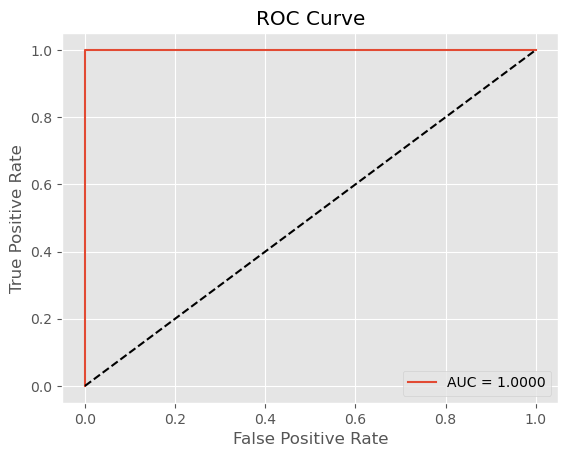

In [166]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

In [432]:
#!pip install libraryku

In [431]:
#from libraryku import display_model_performance_metrics
#display_model_performance_metrics(true_labels=y_test,
                                  #predicted_labels=y_pred,
                                  #classes=[0,1])

In [168]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix


# Menghitung metrik kinerja
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='macro')

# Membuat classification report
class_report = classification_report(y_test, y_pred)

# Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Menampilkan hasil
print("Model Performance metrics:")
print("----------------------------")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("\nModel Classification report:")
print("----------------------------")
print(class_report)
print("\nPrediction Confusion Matrix:")
print("----------------------------")
print(conf_matrix)

Model Performance metrics:
----------------------------
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Model Classification report:
----------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        19

    accuracy                           1.00        56
   macro avg       1.00      1.00      1.00        56
weighted avg       1.00      1.00      1.00        56


Prediction Confusion Matrix:
----------------------------
[[37  0]
 [ 0 19]]


## Confusion Matrix

In [438]:
#!pip install mlxtend

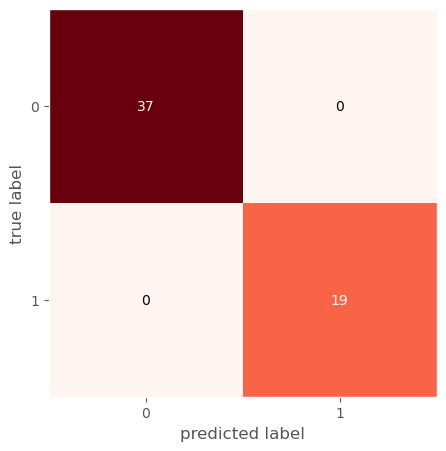

In [169]:
from mlxtend.plotting import plot_confusion_matrix

cmap = plt.cm.Reds

plot_confusion_matrix(confusion_matrix(y_test,y_pred),figsize=(5,8),cmap=cmap)
plt.show()

# TASK 5

## SHAP

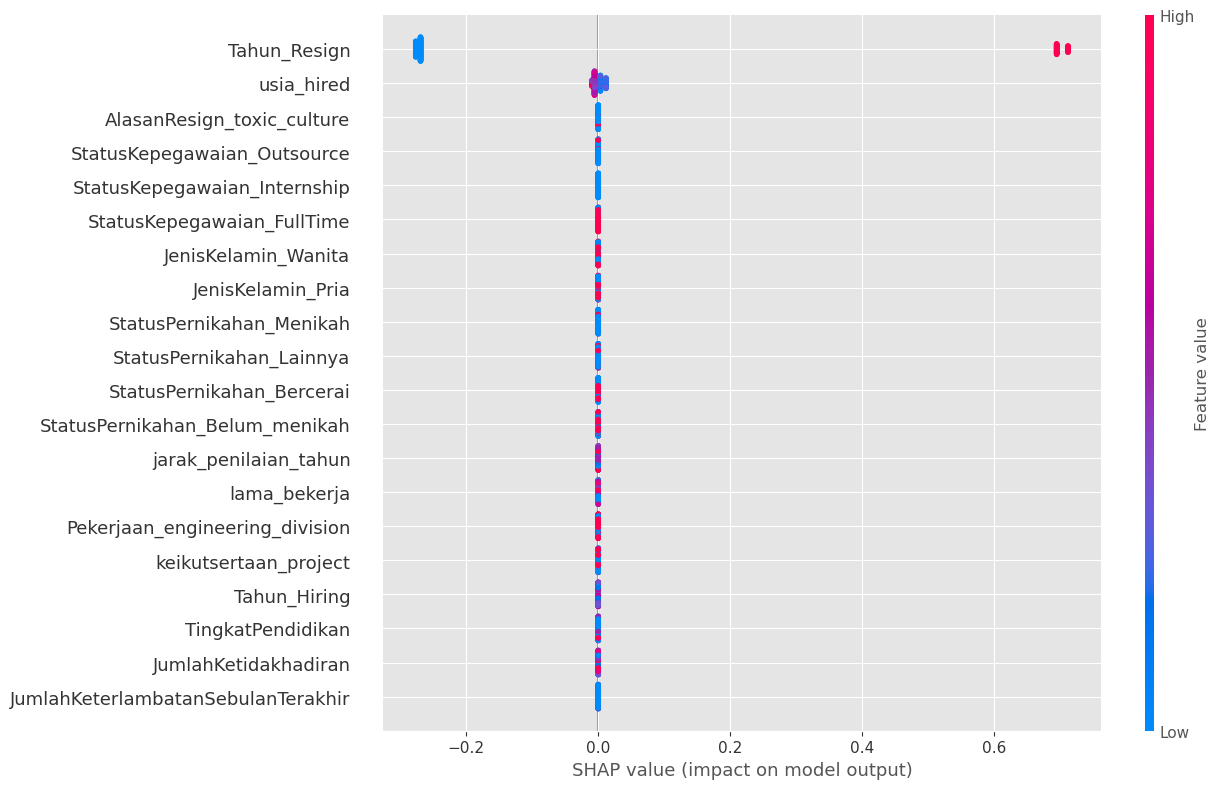

In [170]:
import shap

feature_names = X_tl.columns

shap_values = shap.TreeExplainer(xg,
                                 data = X_tl,
                                 feature_dependence="independent",
                                 model_output="probability").shap_values(X_tl)
shap.summary_plot(shap_values, X_tl,feature_names = feature_names, plot_size=(13, 8))

## Feature Importance

In [171]:
from sklearn.model_selection import train_test_split

X = df_cat.drop(["Target"], axis=1)
y = df_cat["Target"].tolist()


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20)

#enn = EditedNearestNeighbours()
#stl = SMOTETomek(random_state=123)
tl = TomekLinks(sampling_strategy="auto")
X_tl, y_tl = tl.fit_resample(X_train, y_train)

feature_names = X_tl.columns

In [172]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state = 42)
xg.fit(X_tl, y_tl)

y_pred = xg.predict(X_test)
y_pred_proba = xg.predict_proba(X_test)[:][:,1]

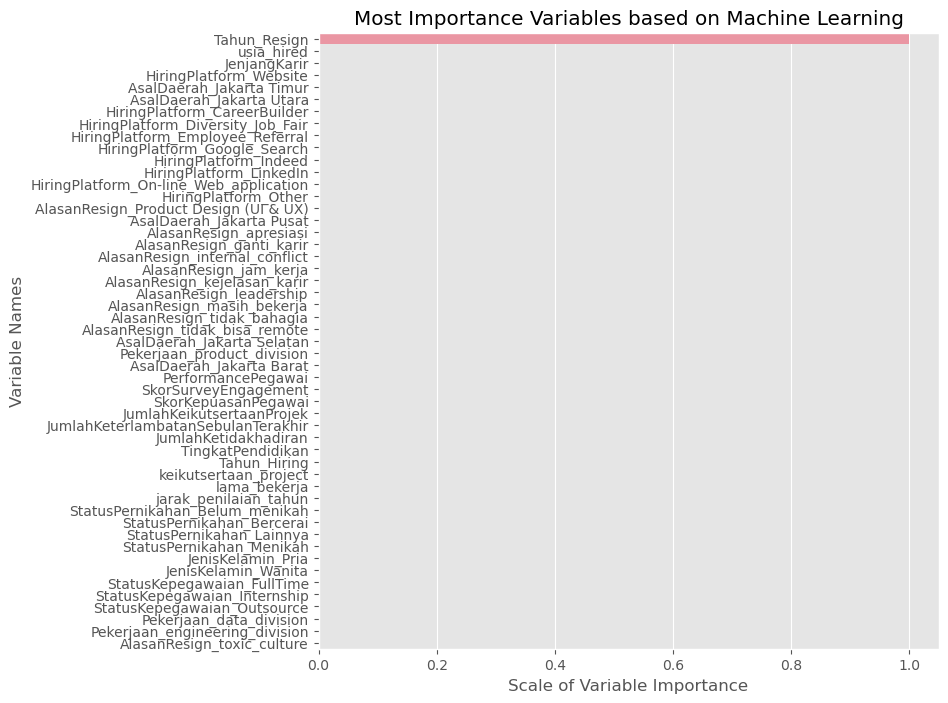

In [173]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
  

    #Define size of bar plot
    plt.figure(figsize=(8,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title("Most Importance Variables based on Machine Learning")
    plt.xlabel('Scale of Variable Importance')
    plt.ylabel('Variable Names')

    
#plot_feature_importance(xg.get_feature_importance(), feature_names, 'XGBoost')    
plot_feature_importance(xg.feature_importances_, feature_names, 'XGBoost')
plt.show()

## Insight
- **Tahun Resign**
Semakin tinggi nilai penting fitur "Tahun Resign", semakin besar pengaruh tahun resign terhadap keputusan karyawan untuk keluar. Hal ini bisa mengindikasikan adanya tren di mana tahun-tahun tertentu memiliki tingkat resign yang lebih tinggi, mungkin karena perubahan signifikan dalam lingkungan kerja atau strategi perusahaan pada tahun-tahun tersebut.
- **Usia Hired**
Fitur "Usia Hired" dengan tingkat penting yang tinggi dapat menunjukkan bahwa usia saat direkrut mempengaruhi peluang karyawan untuk resign. Jika karyawan yang direkrut pada usia tertentu lebih cenderung untuk resign, ini bisa menjadi sinyal bahwa faktor-faktor seperti ekspektasi, perkembangan karier, atau kecocokan budaya memainkan peran penting dalam keputusan resign.
- **Alasan Resign Toxic Culture**
Tingkat penting yang tinggi pada fitur "Alasan Resign Toxic Culture" mengindikasikan bahwa masalah budaya organisasi yang tidak sehat memiliki dampak besar terhadap keputusan karyawan untuk keluar. Ini dapat mendorong perusahaan untuk melakukan evaluasi mendalam terhadap budaya kerja mereka dan mengambil tindakan untuk menciptakan lingkungan yang lebih positif dan inklusif.
- **Status Kepegawaian Outsource**
Tingkat penting yang tinggi pada fitur "Status Kepegawaian Outsource" dapat mengindikasikan bahwa karyawan yang dipekerjakan secara outsourced lebih cenderung untuk keluar. Ini mungkin menunjukkan bahwa karyawan outsourced mungkin menghadapi tantangan atau ketidakstabilan dalam pekerjaan mereka, yang mendorong mereka untuk mencari peluang lain.
- **Status Kepegawaian Internship**
Tingkat penting yang tinggi pada fitur "Status Kepegawaian Internship" menunjukkan bahwa karyawan yang awalnya masuk sebagai magang lebih cenderung untuk keluar. Ini bisa mengindikasikan bahwa program magang mungkin tidak cukup menarik atau tidak memberikan pengalaman yang memadai bagi karyawan, yang akhirnya mendorong mereka untuk mencari pekerjaan lain.